# Analyze GNN-LSTM transfer learning between BBA and nsp10-16

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
from mdgraph.models.gnn_lstm.inference import generate_embeddings
from mpro.analysis.projections import run_tsne
from mpro.plot.utils import plot_tsne

In [11]:
output, loss = generate_embeddings(
    model_cfg_path="/homes/abrace/src/pytorch-geometric-sandbox/test_plots/production-gnn-lstm-run-1/args.json",
    h5_file="/homes/abrace/data/nsp10_16/nsp1016_448_cs1_3.h5",
    model_weights_path="/homes/abrace/src/pytorch-geometric-sandbox/test_plots/production-gnn-lstm-run-1/checkpoints/checkpoints/epoch-50-20210302-191523.pt",
    inference_batch_size=400,
)

  1%|          | 7/731 [00:26<46:06,  3.82s/it]


KeyboardInterrupt: 

In [48]:
run_path = Path("/homes/abrace/src/pytorch-geometric-sandbox/nsp_inference_with_bba_model")

saved = False
if not saved:
    np.save(run_path / "graph_embeddings.npy", output["graph_embeddings"])
    np.save(run_path / "node_embeddings.npy", output["node_embeddings"])
    np.save(run_path / "node_labels.npy", output["node_labels"])
    np.save(run_path / "rmsd.npy", output["rmsd"])
else:
    output = {
        "graph_embeddings": np.load(run_path / "graph_embeddings.npy"),
        "node_embeddings": np.load(run_path / "node_embeddings.npy"),
        "node_labels": np.load(run_path / "node_labels.npy"),
        "rmsd": np.load(run_path / "rmsd.npy"),
    }

In [49]:
tsne_embeddings_path = run_path / "graph_tsne_embeddings.npy"
if tsne_embeddings_path.exists() and False:
    tsne_embeddings = np.load(tsne_embeddings_path)
else:
    tsne_embeddings = run_tsne(output["graph_embeddings"], verbose=2)
    np.save(tsne_embeddings_path, tsne_embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 292400 samples in 0.562s...
[t-SNE] Computed neighbors for 292400 samples in 38.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 292400
[t-SNE] Computed conditional probabilities for sample 2000 / 292400
[t-SNE] Computed conditional probabilities for sample 3000 / 292400
[t-SNE] Computed conditional probabilities for sample 4000 / 292400
[t-SNE] Computed conditional probabilities for sample 5000 / 292400
[t-SNE] Computed conditional probabilities for sample 6000 / 292400
[t-SNE] Computed conditional probabilities for sample 7000 / 292400
[t-SNE] Computed conditional probabilities for sample 8000 / 292400
[t-SNE] Computed conditional probabilities for sample 9000 / 292400
[t-SNE] Computed conditional probabilities for sample 10000 / 292400
[t-SNE] Computed conditional probabilities for sample 11000 / 292400
[t-SNE] Computed conditional probabilities for sample 12000 / 292400
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 120000 / 292400
[t-SNE] Computed conditional probabilities for sample 121000 / 292400
[t-SNE] Computed conditional probabilities for sample 122000 / 292400
[t-SNE] Computed conditional probabilities for sample 123000 / 292400
[t-SNE] Computed conditional probabilities for sample 124000 / 292400
[t-SNE] Computed conditional probabilities for sample 125000 / 292400
[t-SNE] Computed conditional probabilities for sample 126000 / 292400
[t-SNE] Computed conditional probabilities for sample 127000 / 292400
[t-SNE] Computed conditional probabilities for sample 128000 / 292400
[t-SNE] Computed conditional probabilities for sample 129000 / 292400
[t-SNE] Computed conditional probabilities for sample 130000 / 292400
[t-SNE] Computed conditional probabilities for sample 131000 / 292400
[t-SNE] Computed conditional probabilities for sample 132000 / 292400
[t-SNE] Computed conditional probabilities for sample 133000 / 292400
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 243000 / 292400
[t-SNE] Computed conditional probabilities for sample 244000 / 292400
[t-SNE] Computed conditional probabilities for sample 245000 / 292400
[t-SNE] Computed conditional probabilities for sample 246000 / 292400
[t-SNE] Computed conditional probabilities for sample 247000 / 292400
[t-SNE] Computed conditional probabilities for sample 248000 / 292400
[t-SNE] Computed conditional probabilities for sample 249000 / 292400
[t-SNE] Computed conditional probabilities for sample 250000 / 292400
[t-SNE] Computed conditional probabilities for sample 251000 / 292400
[t-SNE] Computed conditional probabilities for sample 252000 / 292400
[t-SNE] Computed conditional probabilities for sample 253000 / 292400
[t-SNE] Computed conditional probabilities for sample 254000 / 292400
[t-SNE] Computed conditional probabilities for sample 255000 / 292400
[t-SNE] Computed conditional probabilities for sample 256000 / 292400
[t-SNE] Computed con

In [53]:
import json
com_dist_path = "/homes/abrace/data/nsp10_16/nsp1016_448_cs1.3_distance.json"
with open(com_dist_path, "r") as f:
    dist = json.load(f)
    
# Sort according to md_run dir run0056_000001
dist = sorted(dist, key=lambda traj: Path(traj[0]["dcd_file"]).parent)
# Extract distances
distances = np.array([datum["dist"] for traj in dist for datum in traj])
mask = distances < 35

In [54]:
paint = {"rmsd": output["rmsd"][mask], "distance": distances[mask]}
fig = plot_tsne(tsne_embeddings[mask], paint, color="distance")

In [ ]:
fig.show()

In [35]:
df = pd.DataFrame(distances)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

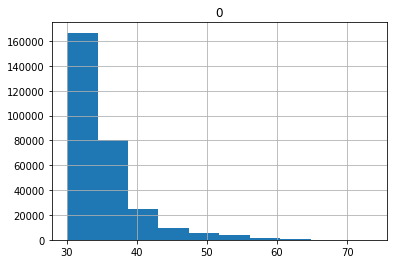

In [38]:
df.hist()

In [42]:
df = pd.DataFrame(distances[mask])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

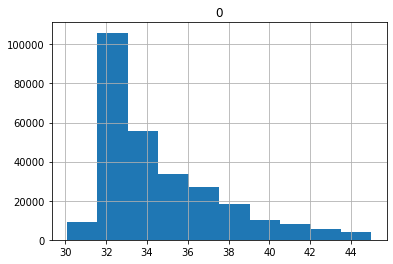

In [43]:
df.hist()

In [46]:
len(distances[mask])

276995

# Trained on nsp10-16 data, visualize training embeddings

In [ ]:
pd.read_csv("/homes/abrace/src/pytorch-geometric-sandbox/test_plots/gnn-lstm--nsp1016-run-0/loss.csv", index_col="epoch").plot()

In [ ]:
output, loss = generate_embeddings(
    model_cfg_path="/homes/abrace/src/pytorch-geometric-sandbox/test_plots/gnn-lstm--nsp1016-run-0/args.json",
    h5_file="/homes/abrace/data/nsp10_16/nsp1016_448_cs1_3.h5",
    model_weights_path="/homes/abrace/src/pytorch-geometric-sandbox/test_plots/gnn-lstm--nsp1016-run-0/checkpoints/epoch-35-20210310-064651.pt",
    inference_batch_size=400,
)

In [ ]:
run_path = Path("/homes/abrace/src/pytorch-geometric-sandbox/test_plots/gnn-lstm--nsp1016-run-0/")

saved = True
if not saved:
    np.save(run_path / "graph_embeddings.npy", output["graph_embeddings"])
    np.save(run_path / "node_embeddings.npy", output["node_embeddings"])
    np.save(run_path / "node_labels.npy", output["node_labels"])
    np.save(run_path / "rmsd.npy", output["rmsd"])
else:
    output = {
        "graph_embeddings": np.load(run_path / "graph_embeddings.npy"),
        "node_embeddings": np.load(run_path / "node_embeddings.npy"),
        "node_labels": np.load(run_path / "node_labels.npy"),
        "rmsd": np.load(run_path / "rmsd.npy"),
    }
    
tsne_embeddings_path = run_path / "graph_tsne_embeddings.npy"
if tsne_embeddings_path.exists():
    tsne_embeddings = np.load(tsne_embeddings_path)
else:
    tsne_embeddings = run_tsne(output["graph_embeddings"], verbose=2)
    np.save(tsne_embeddings_path, tsne_embeddings)
    
import json
com_dist_path = "/homes/abrace/data/nsp10_16/nsp1016_448_cs1.3_distance.json"
with open(com_dist_path, "r") as f:
    dist = json.load(f)
    
# Sort according to md_run dir run0056_000001
dist = sorted(dist, key=lambda traj: Path(traj[0]["dcd_file"]).parent)
# Extract distances
distances = np.array([datum["dist"] for traj in dist for datum in traj])
mask = distances < 35

In [ ]:
paint = {"rmsd": output["rmsd"][mask], "distance": distances[mask]}
fig = plot_tsne(tsne_embeddings[mask], paint, color="distance")
fig.show()

# Trained on nsp10-16 data, transfer to 1FME-1

In [20]:
run_path = Path("/homes/abrace/src/pytorch-geometric-sandbox/test_plots/gnn-lstm--nsp1016-run-0/1FME-1_results")

saved = True
if not saved:
    np.save(run_path / "graph_embeddings.npy", output["graph_embeddings"])
    np.save(run_path / "node_embeddings.npy", output["node_embeddings"])
    np.save(run_path / "node_labels.npy", output["node_labels"])
    np.save(run_path / "rmsd.npy", output["rmsd"])
else:
    output = {
        "graph_embeddings": np.load(run_path / "graph_embeddings.npy"),
        "node_embeddings": np.load(run_path / "node_embeddings.npy"),
        "node_labels": np.load(run_path / "node_labels.npy"),
        "rmsd": np.load(run_path / "rmsd.npy"),
    }
    
tsne_embeddings_path = run_path / "graph_tsne_embeddings.npy"
if tsne_embeddings_path.exists():
    tsne_embeddings = np.load(tsne_embeddings_path)
else:
    tsne_embeddings = run_tsne(output["graph_embeddings"], verbose=2)
    np.save(tsne_embeddings_path, tsne_embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 510650 samples in 0.897s...
[t-SNE] Computed neighbors for 510650 samples in 92.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 510650
[t-SNE] Computed conditional probabilities for sample 2000 / 510650
[t-SNE] Computed conditional probabilities for sample 3000 / 510650
[t-SNE] Computed conditional probabilities for sample 4000 / 510650
[t-SNE] Computed conditional probabilities for sample 5000 / 510650
[t-SNE] Computed conditional probabilities for sample 6000 / 510650
[t-SNE] Computed conditional probabilities for sample 7000 / 510650
[t-SNE] Computed conditional probabilities for sample 8000 / 510650
[t-SNE] Computed conditional probabilities for sample 9000 / 510650
[t-SNE] Computed conditional probabilities for sample 10000 / 510650
[t-SNE] Computed conditional probabilities for sample 11000 / 510650
[t-SNE] Computed conditional probabilities for sample 12000 / 510650
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 118000 / 510650
[t-SNE] Computed conditional probabilities for sample 119000 / 510650
[t-SNE] Computed conditional probabilities for sample 120000 / 510650
[t-SNE] Computed conditional probabilities for sample 121000 / 510650
[t-SNE] Computed conditional probabilities for sample 122000 / 510650
[t-SNE] Computed conditional probabilities for sample 123000 / 510650
[t-SNE] Computed conditional probabilities for sample 124000 / 510650
[t-SNE] Computed conditional probabilities for sample 125000 / 510650
[t-SNE] Computed conditional probabilities for sample 126000 / 510650
[t-SNE] Computed conditional probabilities for sample 127000 / 510650
[t-SNE] Computed conditional probabilities for sample 128000 / 510650
[t-SNE] Computed conditional probabilities for sample 129000 / 510650
[t-SNE] Computed conditional probabilities for sample 130000 / 510650
[t-SNE] Computed conditional probabilities for sample 131000 / 510650
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 245000 / 510650
[t-SNE] Computed conditional probabilities for sample 246000 / 510650
[t-SNE] Computed conditional probabilities for sample 247000 / 510650
[t-SNE] Computed conditional probabilities for sample 248000 / 510650
[t-SNE] Computed conditional probabilities for sample 249000 / 510650
[t-SNE] Computed conditional probabilities for sample 250000 / 510650
[t-SNE] Computed conditional probabilities for sample 251000 / 510650
[t-SNE] Computed conditional probabilities for sample 252000 / 510650
[t-SNE] Computed conditional probabilities for sample 253000 / 510650
[t-SNE] Computed conditional probabilities for sample 254000 / 510650
[t-SNE] Computed conditional probabilities for sample 255000 / 510650
[t-SNE] Computed conditional probabilities for sample 256000 / 510650
[t-SNE] Computed conditional probabilities for sample 257000 / 510650
[t-SNE] Computed conditional probabilities for sample 258000 / 510650
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 373000 / 510650
[t-SNE] Computed conditional probabilities for sample 374000 / 510650
[t-SNE] Computed conditional probabilities for sample 375000 / 510650
[t-SNE] Computed conditional probabilities for sample 376000 / 510650
[t-SNE] Computed conditional probabilities for sample 377000 / 510650
[t-SNE] Computed conditional probabilities for sample 378000 / 510650
[t-SNE] Computed conditional probabilities for sample 379000 / 510650
[t-SNE] Computed conditional probabilities for sample 380000 / 510650
[t-SNE] Computed conditional probabilities for sample 381000 / 510650
[t-SNE] Computed conditional probabilities for sample 382000 / 510650
[t-SNE] Computed conditional probabilities for sample 383000 / 510650
[t-SNE] Computed conditional probabilities for sample 384000 / 510650
[t-SNE] Computed conditional probabilities for sample 385000 / 510650
[t-SNE] Computed conditional probabilities for sample 386000 / 510650
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 491000 / 510650
[t-SNE] Computed conditional probabilities for sample 492000 / 510650
[t-SNE] Computed conditional probabilities for sample 493000 / 510650
[t-SNE] Computed conditional probabilities for sample 494000 / 510650
[t-SNE] Computed conditional probabilities for sample 495000 / 510650
[t-SNE] Computed conditional probabilities for sample 496000 / 510650
[t-SNE] Computed conditional probabilities for sample 497000 / 510650
[t-SNE] Computed conditional probabilities for sample 498000 / 510650
[t-SNE] Computed conditional probabilities for sample 499000 / 510650
[t-SNE] Computed conditional probabilities for sample 500000 / 510650
[t-SNE] Computed conditional probabilities for sample 501000 / 510650
[t-SNE] Computed conditional probabilities for sample 502000 / 510650
[t-SNE] Computed conditional probabilities for sample 503000 / 510650
[t-SNE] Computed conditional probabilities for sample 504000 / 510650
[t-SNE] Computed con

In [ ]:
paint = {"rmsd": output["rmsd"]}
fig = plot_tsne(tsne_embeddings, paint, color="rmsd")
fig.show()

In [22]:
df = pd.DataFrame(output["graph_embeddings"])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

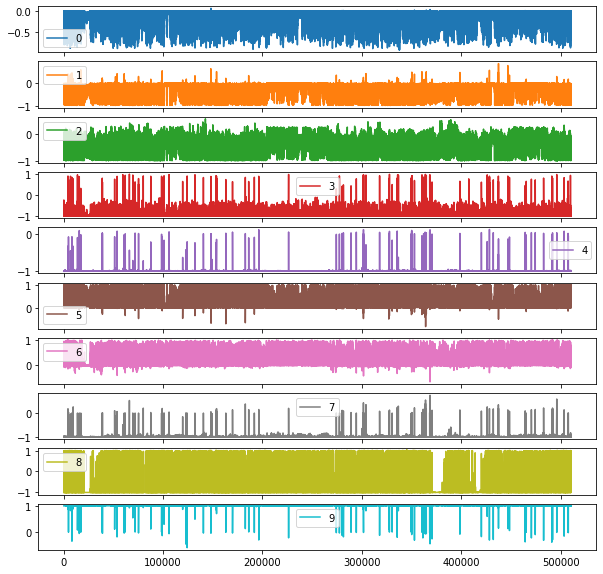

In [25]:
df.plot(subplots=True, figsize=(10,10))